In [1]:
import pandas as pd
import numpy as np
import edhec_risk_ph as erk
%load_ext autoreload
%autoreload 2
ind_return = erk.get_ind_returns()
ind_nfirm = erk.get_ind_nfirms()
ind_size = erk.get_ind_sizes()

#er = erk.annualize_rets(ind['1996':'2000'], 12)
#cov = ind['1996':'2000'].cov() * 12

In [2]:
ind_return.shape, ind_nfirm.shape, ind_size.shape

((1110, 30), (1110, 30), (1110, 30))

In [2]:
ind_mktcap = ind_nfirm * ind_size
ind_mktcap.shape

(1110, 30)

In [3]:
total_mktcap = ind_mktcap.sum(axis=1)

<Axes: title={'center': 'Total Market Capitalization of all Industries'}>

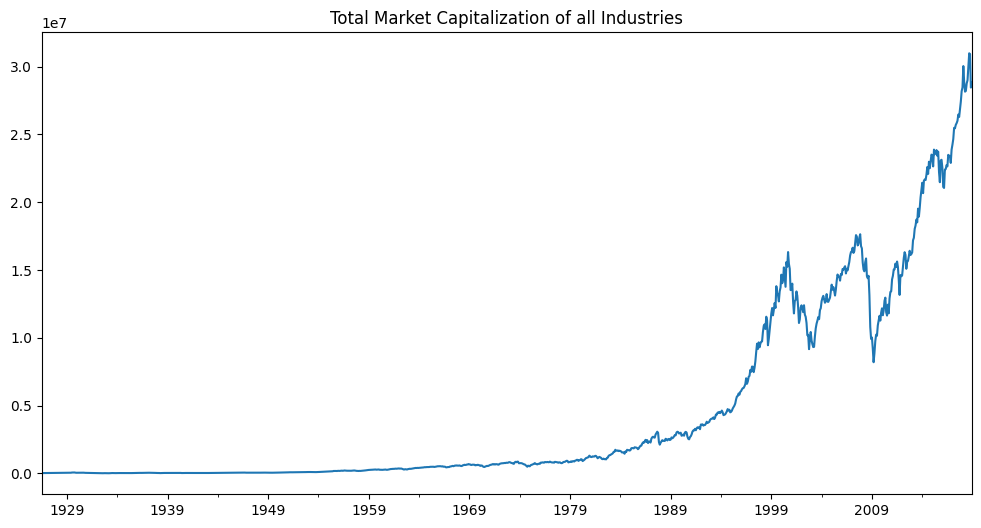

In [4]:
total_mktcap.plot(title='Total Market Capitalization of all Industries', figsize=(12,6))

In [5]:
ind_capweights = ind_mktcap.div(total_mktcap, axis='rows')
ind_capweights.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [6]:
ind_capweights.loc["1926"].sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<Axes: title={'center': 'Industry Capitalization Weights Over Time'}>

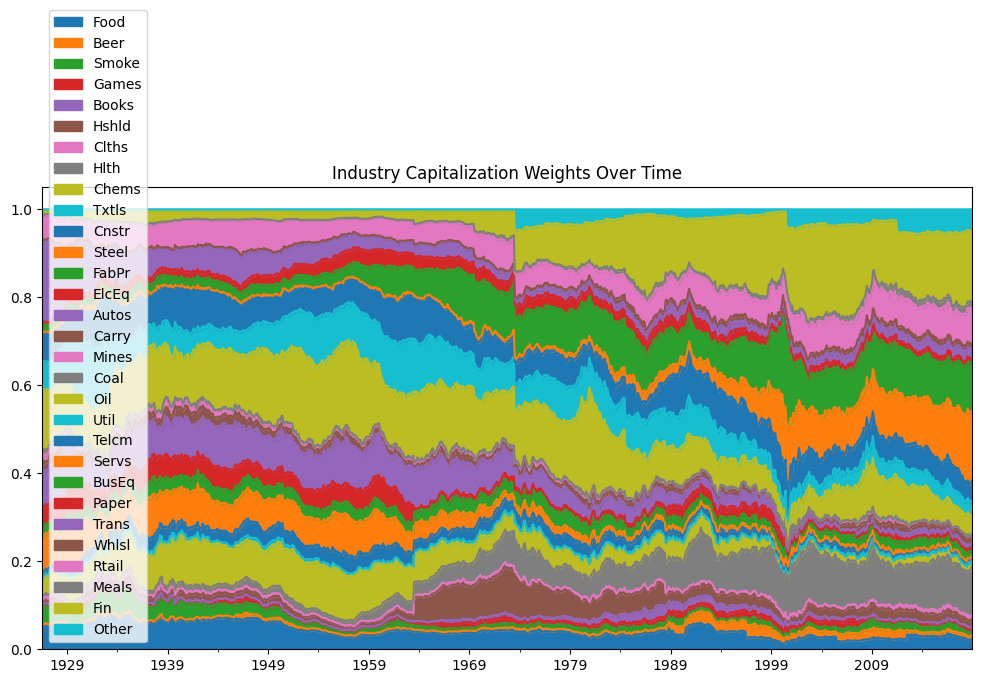

In [7]:
ind_capweights.plot.area(figsize=(12,6), title='Industry Capitalization Weights Over Time') 

<Axes: title={'center': 'Finance and Steel Capitalization Weights Over Time'}>

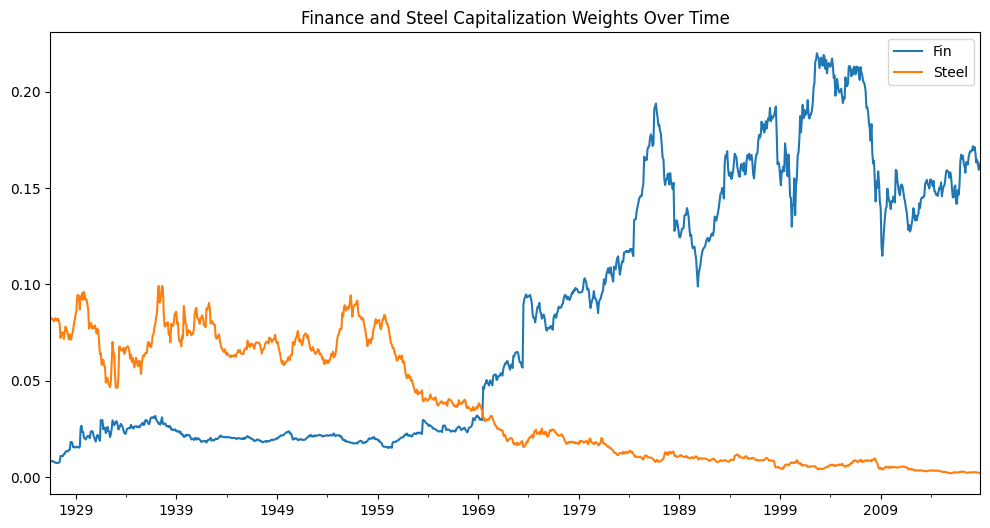

In [8]:
ind_capweights[["Fin","Steel"]].plot(figsize=(12,6), title='Finance and Steel Capitalization Weights Over Time')

In [9]:
ind_capweights.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

<Axes: >

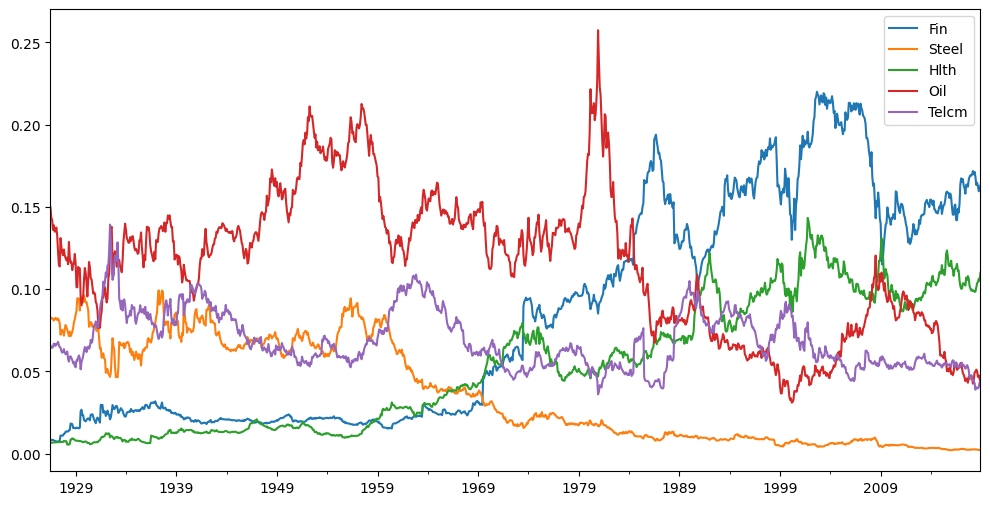

In [10]:
ind_capweights[["Fin","Steel","Hlth","Oil","Telcm"]].plot(figsize=(12,6))

<Axes: title={'center': 'Total Market Return'}>

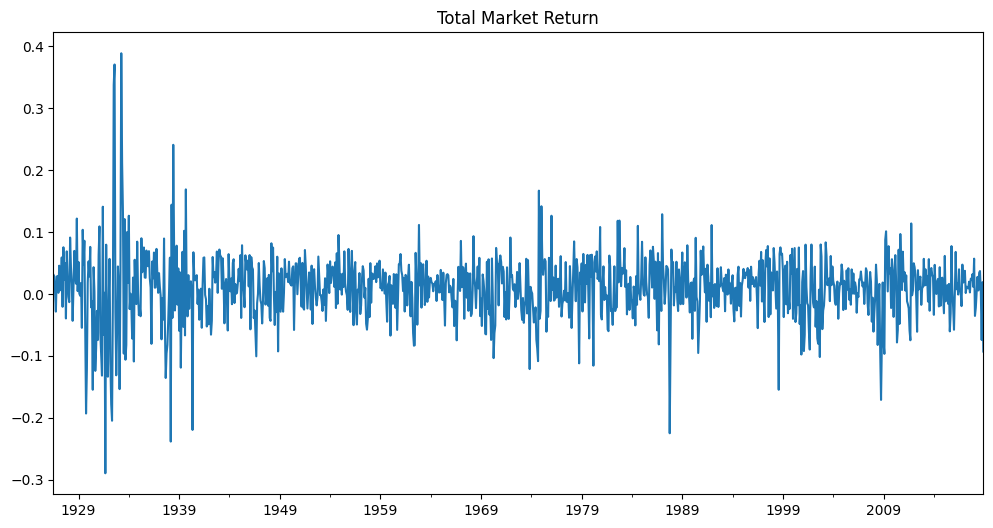

In [11]:
total_market_return = (ind_capweights * ind_return).sum(axis='columns')
total_market_return.plot(figsize=(12,6), title='Total Market Return')

<Axes: title={'center': 'Total Market Index Level'}>

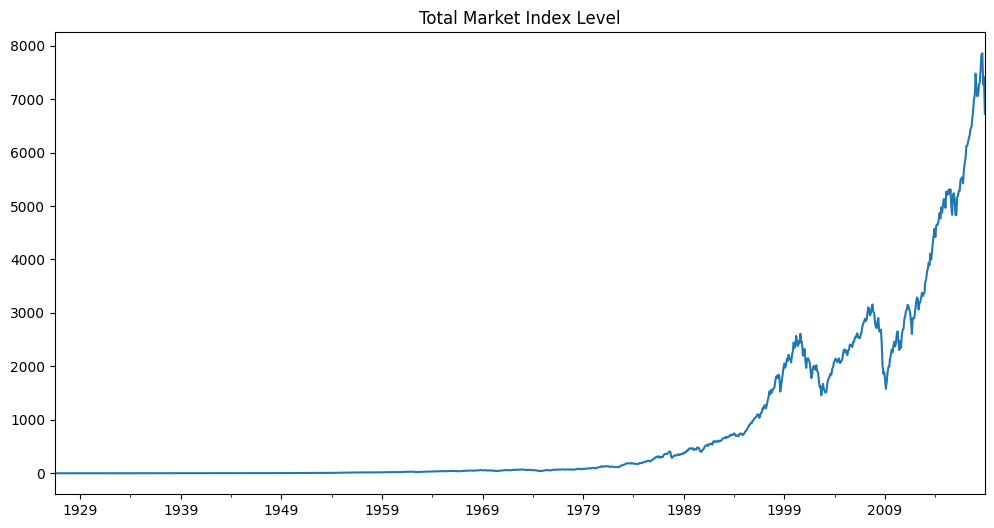

In [12]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(12,6), title='Total Market Index Level')

<Axes: title={'center': 'Total Market Index Level Since 1980'}>

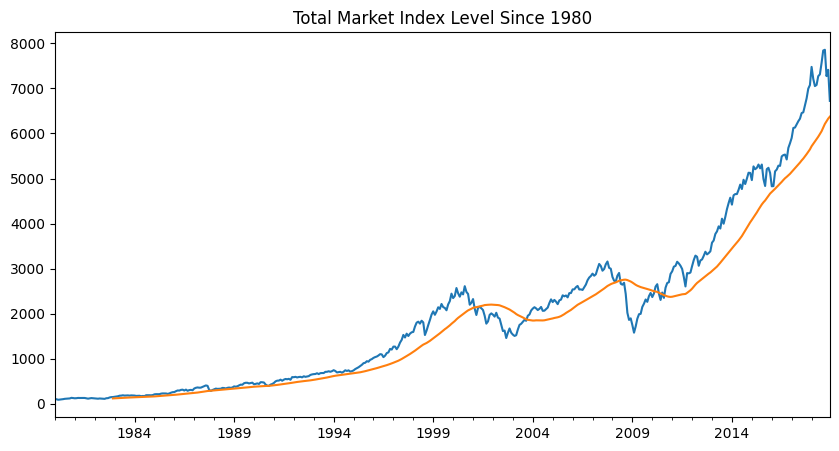

In [13]:
total_market_index["1980":].plot(figsize=(10,5), title='Total Market Index Level Since 1980')
total_market_index["1980":].rolling(window=36).mean().plot(label='12-Month Moving Average')

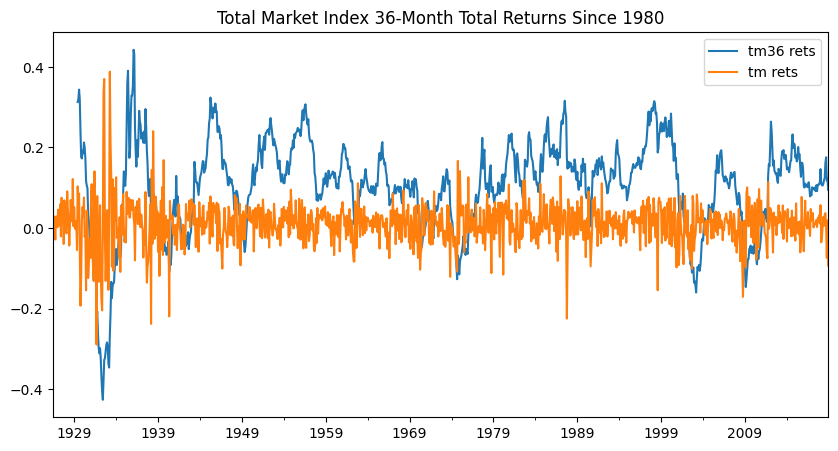

In [14]:
import matplotlib.pyplot as plt

tmi_tr36rets = total_market_return.rolling(window=36).aggregate(lambda x: erk.annualize_rets(x, periods_per_year=12))
tmi_tr36rets.plot(figsize=(10,5), label="tm36 rets", title='Total Market Index 36-Month Total Returns Since 1980')
total_market_return.plot(label="tm rets")
plt.legend()

In [15]:
## rolling correlation example
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [16]:
ts_corr.index.names = ['Date', 'Industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
Date    Industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

<Axes: title={'center': 'Average 36-Month Rolling Correlation Between Industries'}, xlabel='Date'>

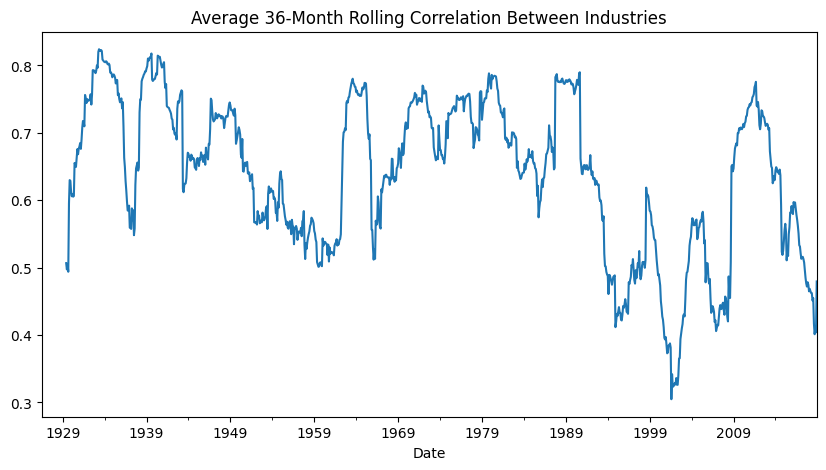

In [17]:
ind_tr36corr = ts_corr.groupby(level='Date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.plot(figsize=(10,5), title='Average 36-Month Rolling Correlation Between Industries')

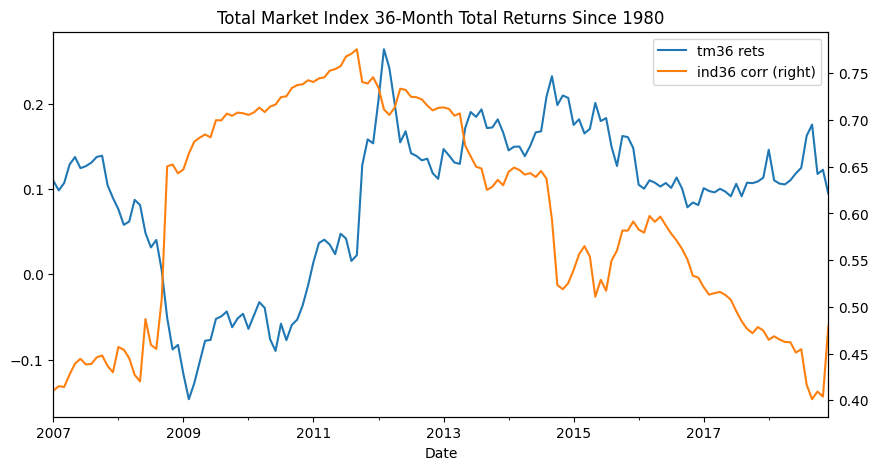

In [18]:
import matplotlib.pyplot as plt

tmi_tr36rets = total_market_return.rolling(window=36).aggregate(lambda x: erk.annualize_rets(x, periods_per_year=12))

# Create the first plot and store the axes
ax = tmi_tr36rets["2007":].plot(figsize=(10,5), label="tm36 rets", title='Total Market Index 36-Month Total Returns Since 1980')
# Plot on a secondary y-axis
ax2 = ind_tr36corr["2007":].plot(ax=ax, label="ind36 corr", secondary_y=True)

# Combine legends from both axes
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='best')

In [19]:
tmi_tr36rets.corr(ind_tr36corr)

np.float64(-0.28010065062883993)

In [22]:
def get_total_market_index_returns():
    """
    Calculate total market index returns based on cap-weighted industry returns.
    
    Returns
    -------
    DataFrame
        DataFrame containing total market returns with date index
    """
    # Load all required data
    ind_return = erk.get_ind_returns()
    ind_nfirm = erk.get_ind_nfirms()
    ind_size = erk.get_ind_sizes()
    
    # Calculate market capitalization for each industry
    ind_mktcap = ind_nfirm * ind_size
    
    # Calculate total market cap across all industries
    total_mktcap = ind_mktcap.sum(axis=1)
    
    # Calculate cap weights for each industry
    ind_capweights = ind_mktcap.div(total_mktcap, axis='rows')
    
    # Calculate total market return as weighted sum
    total_market_return = (ind_capweights * ind_return).sum(axis='columns')
    
    # Return as DataFrame with proper column name
    return pd.DataFrame({'TotalMarketReturn': total_market_return})

In [23]:
x = get_total_market_index_returns()
x.head()

,TotalMarketReturn
1926-07,0.031375
1926-08,0.028957
1926-09,0.005566
1926-10,-0.028504
1926-11,0.028039
